In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r'data\ds_salaries.csv')

In [4]:
df.head(9)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M


In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Tratamiento

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.shape[0]

3755

In [8]:
df.duplicated().sum()

np.int64(1171)

In [9]:
df.drop_duplicates(inplace=True) #Removemos los duplicados ya que no aportan información adicional y pueden afectar el análisis

### EDA

In [45]:
df['salary'].max()

np.int64(30400000)

In [46]:
df.groupby('job_title')['salary'].mean().sort_values(ascending=False).round(2)

job_title
Head of Machine Learning          6000000.00
Principal Data Architect          3000000.00
Lead Machine Learning Engineer    2548666.67
Lead Data Scientist                928485.33
Data Analytics Lead                922500.00
                                     ...    
Insight Analyst                     38500.00
Compliance Data Analyst             30000.00
Autonomous Vehicle Technician       26277.50
Staff Data Analyst                  15000.00
Product Data Scientist               8000.00
Name: salary, Length: 93, dtype: float64

<div align="center">

#### Top 10 Empleos que ganan mas dinero


</div>

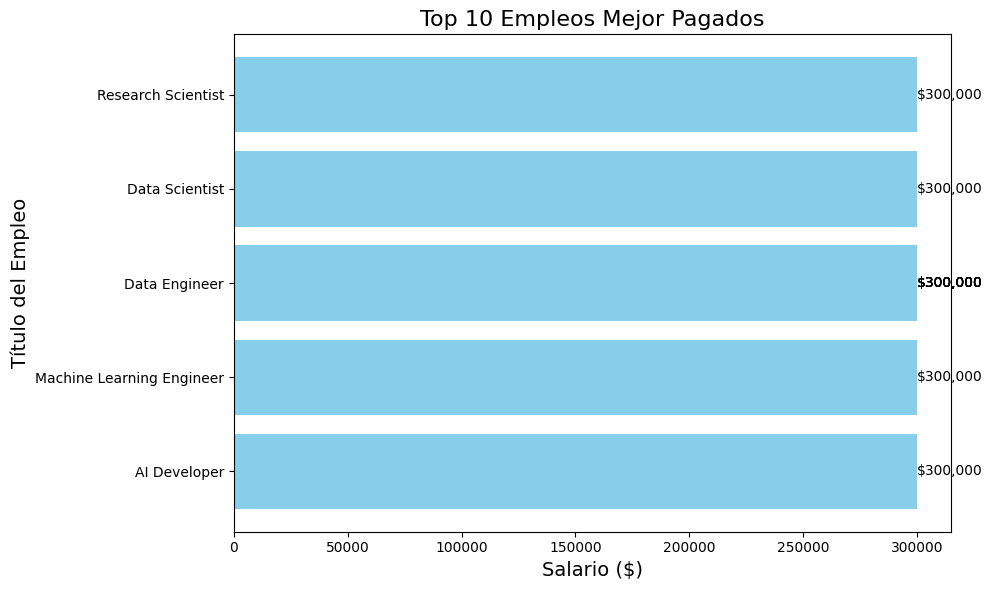

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV (reemplaza 'data/ds_salaries.csv' con la ruta de tu archivo)
df = pd.read_csv('data/ds_salaries.csv')

# Calcular el IQR para identificar outliers
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
df_filtrado = df[(df['salary'] >= (Q1 - 1.5 * IQR)) & (df['salary'] <= (Q3 + 1.5 * IQR))]

# Obtener los 10 empleos con los salarios más altos sin outliers
top_10_empleos = df_filtrado.nlargest(10, 'salary')[['job_title', 'salary']]

# Ordenar los datos para mejor visualización
top_10_empleos = top_10_empleos.sort_values(by='salary')

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_empleos['job_title'], top_10_empleos['salary'], color='skyblue')

# Añadir título y etiquetas
plt.title('Top 10 Empleos Mejor Pagados', fontsize=16)
plt.xlabel('Salario ($)', fontsize=14)
plt.ylabel('Título del Empleo', fontsize=14)

# Añadir bocadillos con el salario correspondiente
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'${int(bar.get_width()):,}', 
             va='center', ha='left', fontsize=10)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<div align="center">

#### *Cual es el tipo de empleo que permite mas trabajo remoto?*

</div>




In [47]:
df['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

In [48]:
df[df['remote_ratio'] == 100]['job_title'].value_counts()

job_title
Data Engineer                         432
Data Scientist                        380
Data Analyst                          270
Machine Learning Engineer             109
Data Architect                         69
                                     ... 
Lead Machine Learning Engineer          1
Machine Learning Research Engineer      1
Data Scientist Lead                     1
Data Analytics Lead                     1
Staff Data Scientist                    1
Name: count, Length: 75, dtype: int64

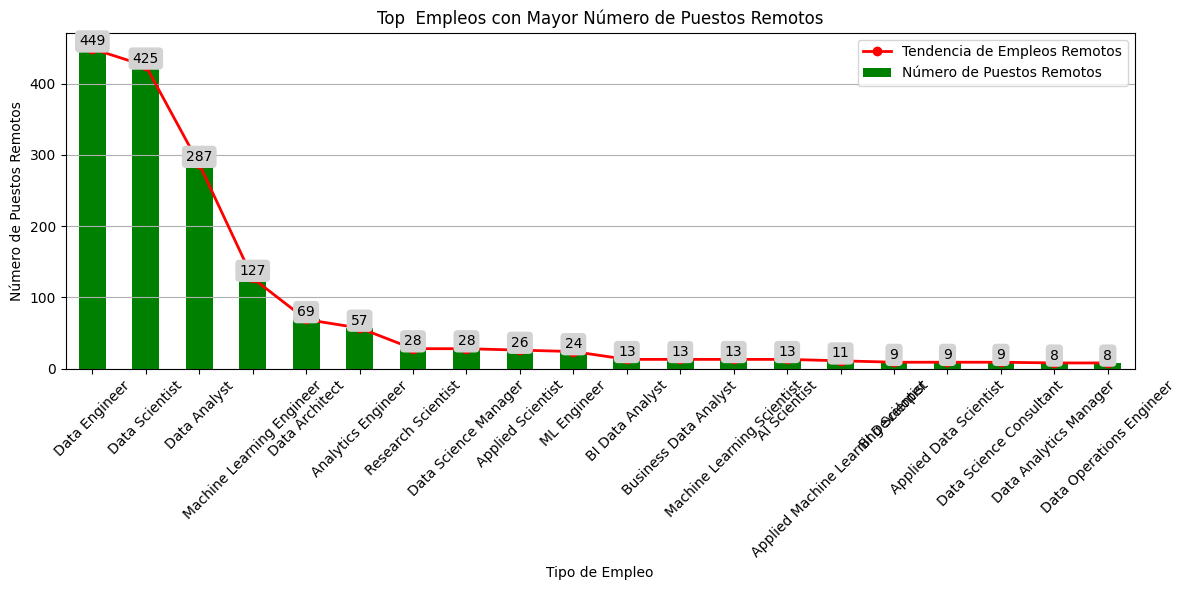

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'data\ds_salaries.csv')


# Filtrar para incluir solo las filas con trabajo remoto
df_remote = df[df['remote_ratio'] > 0]

# Contar el número de puestos remotos por tipo de empleo
empleo_remote_count = df_remote['job_title'].value_counts().head(20)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))

# Definir color verde para las barras
bar_color = 'green'

# Crear el gráfico de barras
bars = empleo_remote_count.plot(kind='bar', color=bar_color, label='Número de Puestos Remotos')
plt.title('Top  Empleos con Mayor Número de Puestos Remotos')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Número de Puestos Remotos')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el número total de puestos remotos como bocadillos
for idx, value in enumerate(empleo_remote_count):
    plt.text(idx, value + 0.5, str(value), ha='center', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='lightgray'))

# Añadir una línea que conecte los puntos desde el mayor al menor
plt.plot(empleo_remote_count.index, empleo_remote_count.values, color='red', marker='o', linestyle='-', linewidth=2, label='Tendencia de Empleos Remotos')

# Añadir leyenda para la línea
plt.legend(loc='upper right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


<div align="center">

#### *¿Cual es el salario promedio de los empleados de Data Scientist?*
 

 </div>

In [50]:
df[df['job_title'] == 'Data Scientist']['salary'].mean().round(2)

np.float64(239073.48)

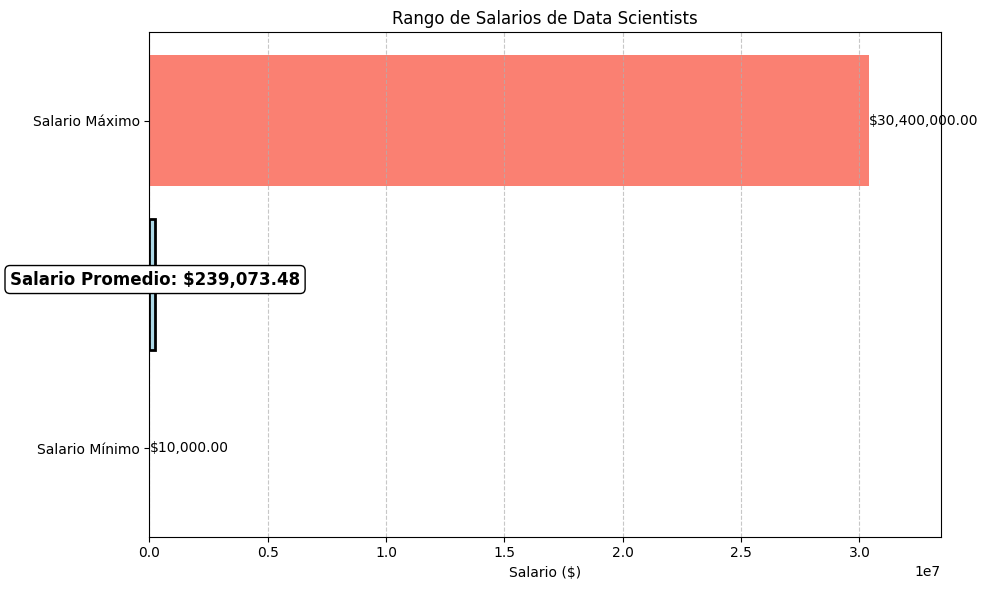

El salario promedio de los empleados de Data Scientist es: $239,073.48


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv(r'data\ds_salaries.csv')

data_scientists = df[df['job_title'] == 'Data Scientist']

# Calcular los salarios mínimo, medio y máximo
salario_minimo = data_scientists['salary'].min()
salario_medio = data_scientists['salary'].mean()
salario_maximo = data_scientists['salary'].max()

# Crear listas de etiquetas y salarios, reordenando para la gráfica
etiquetas = ['Salario Mínimo', 'Salario Promedio', 'Salario Máximo']
salarios = [salario_minimo, salario_medio, salario_maximo]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(etiquetas, salarios, color=['lightgreen', 'lightblue', 'salmon'])

# Añadir título y etiquetas
plt.title('Rango de Salarios de Data Scientists')
plt.xlabel('Salario ($)')
plt.xlim(0, salario_maximo * 1.1)  # Ajustar límite derecho

# Añadir anotaciones para cada barra
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'${xval:,.2f}', ha='left', va='center')

# Resaltar el salario promedio con un borde
avg_bar = bars[1]
avg_bar.set_edgecolor('black')
avg_bar.set_linewidth(2)

# Mostrar el salario promedio en un texto destacado
plt.text(salario_medio, 1, f'Salario Promedio: ${salario_medio:,.2f}', 
         fontsize=12, color='black', weight='bold', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Mostrar la gráfica
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Mostrar el salario promedio en consola
print(f"El salario promedio de los empleados de Data Scientist es: ${salario_medio:,.2f}")





<div align="center">

#### *¿Cuantas personas ganan por encima de los 200ks?*

</div>
 

In [19]:
df[df['salary']>200_000].shape[0]

606

In [53]:
len(df[df['salary']>200_000])

606

In [54]:
sum(df['salary']>200_000)

606

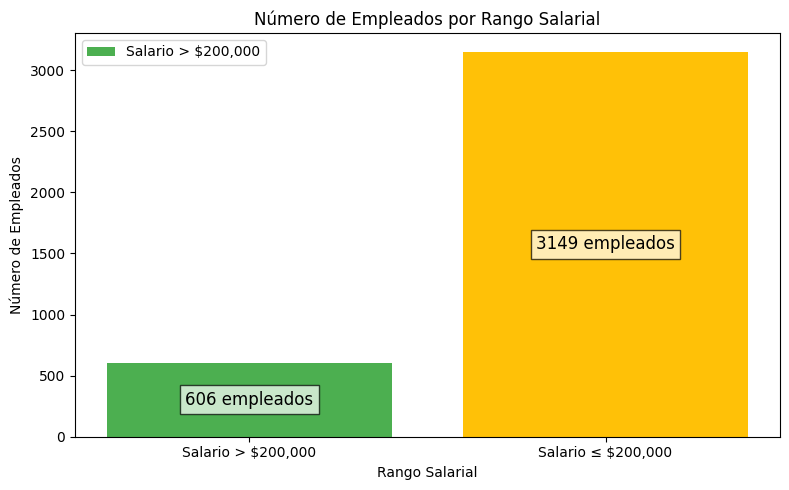

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv(r'data\ds_salaries.csv')

# Contar el número de empleados que ganan más de 200k
num_mas_200k = df[df['salary'] > 200000].shape[0]
num_menos_200k = df[df['salary'] <= 200000].shape[0]

# Preparar los datos para la gráfica
data = {'Salario > $200,000': num_mas_200k, 'Salario ≤ $200,000': num_menos_200k}
categorias = list(data.keys())
valores = list(data.values())

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(categorias, valores, color=['#4CAF50', '#FFC107'])

# Añadir título y etiquetas
plt.title('Número de Empleados por Rango Salarial')
plt.xlabel('Rango Salarial')
plt.ylabel('Número de Empleados')

for i, value in enumerate(valores):
    plt.text(i, value / 2, f'{value} empleados', 
             ha='center', va='center', fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7))

# Añadir leyenda
plt.legend(['Salario > $200,000', 'Salario ≤ $200,000'], loc='upper left')
# Mostrar la gráfica
plt.tight_layout()
plt.show()


<div align="center">

#### *¿ Cúal es el salario promedio de los empleados Data Modeler en ES ?*

</div>

In [93]:
df[ (df['job_title']=='Data Modeler') & (df['experience_level']=='ES')]['salary_in_usd'].mean()


nan

posx and posy should be finite values
posx and posy should be finite values


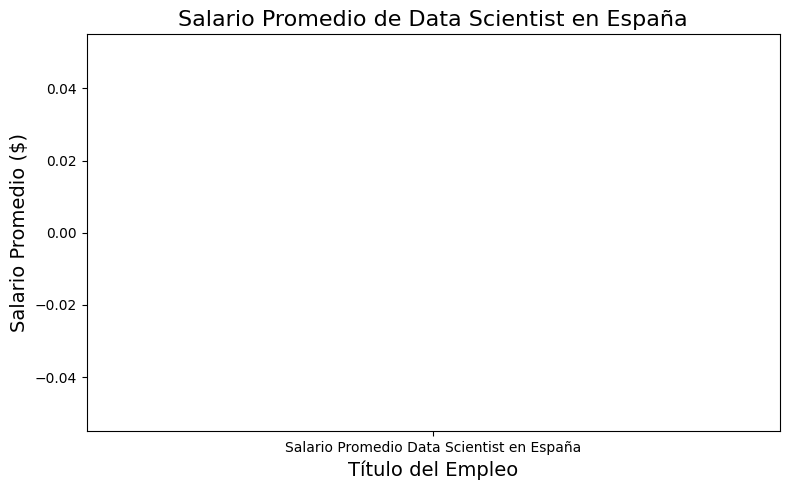

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV (reemplaza 'data/ds_salaries.csv' con la ruta de tu archivo)
df = pd.read_csv('data/ds_salaries.csv')

# Filtrar los datos para obtener solo los Data Modelers en España
data_modelers_spain = df[(df['job_title'] == 'Data Scientist') & (df['company_location'] == 'Spain')]

# Calcular el salario promedio
salario_promedio = data_modelers_spain['salary'].mean()

# Preparar datos para la gráfica
labels = ['Salario Promedio Data Scientist en España']
values = [salario_promedio]

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')

# Añadir título y etiquetas
plt.title('Salario Promedio de Data Scientist en España', fontsize=16)
plt.xlabel('Título del Empleo', fontsize=14)
plt.ylabel('Salario Promedio ($)', fontsize=14)

# Añadir el valor del salario en la barra
plt.text(0, salario_promedio + 1000, f'${salario_promedio:,.2f}', ha='center', fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


<div align="center">

#### *Para los ML Engineer, ¿ Qué diferencia de salario hay entre full time y part time ?*
 
</div>

In [57]:
salary_FT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['FT']
salary_PT = df[['employment_type','salary_in_usd']][df['job_title']=='ML Engineer'].groupby('employment_type').mean().loc['PT']

salary_FT-salary_PT

salary_in_usd    152117.9
dtype: float64

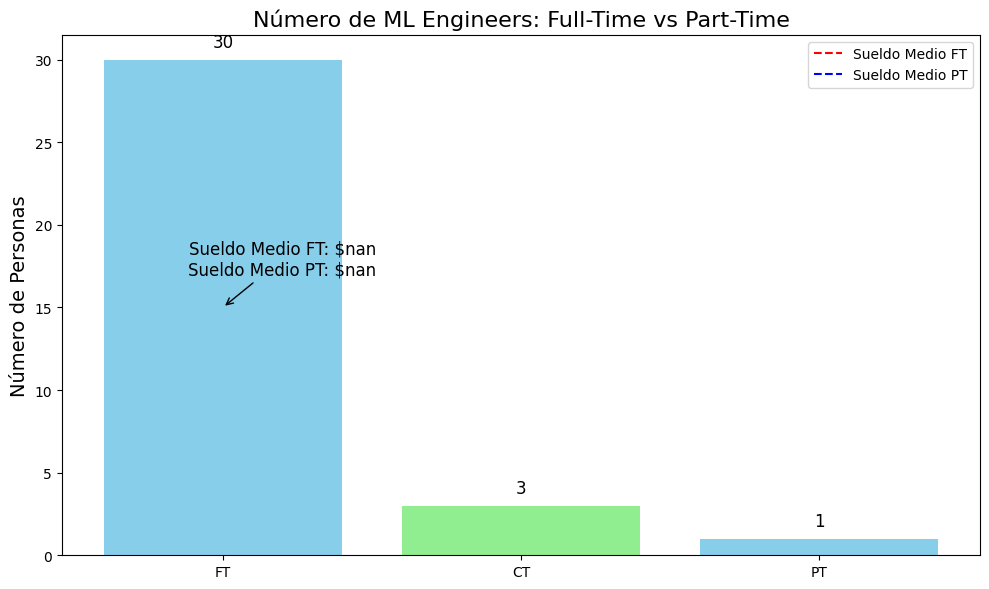

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV (reemplaza 'data/ds_salaries.csv' con la ruta de tu archivo)
df = pd.read_csv('data/ds_salaries.csv')

# Filtrar los datos para obtener solo los ML Engineers
ml_engineers = df[df['job_title'] == 'ML Engineer']

# Contar el número de ML Engineers por tipo de empleo
empleo_counts = ml_engineers['employment_type'].value_counts()

# Calcular el sueldo medio de ML Engineers a tiempo completo y a tiempo parcial
sueldo_medio_full_time = ml_engineers[ml_engineers['employment_type'] == 'full_time']['salary'].mean()
sueldo_medio_part_time = ml_engineers[ml_engineers['employment_type'] == 'part_time']['salary'].mean()

# Calcular la diferencia entre sueldos
diferencia_sueldo = sueldo_medio_full_time - sueldo_medio_part_time

# Preparar datos para la gráfica
labels = empleo_counts.index
values = empleo_counts.values

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['skyblue', 'lightgreen'])

# Añadir título y etiquetas
plt.title('Número de ML Engineers: Full-Time vs Part-Time', fontsize=16)
plt.ylabel('Número de Personas', fontsize=14)

# Añadir el valor del número de personas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}', ha='center', va='bottom', fontsize=12)

# Añadir bocadillo para el sueldo medio en la barra de Full-Time
plt.annotate(f'Sueldo Medio FT: ${sueldo_medio_full_time:,.2f}\nSueldo Medio PT: ${sueldo_medio_part_time:,.2f}', 
             xy=(0, values[0] / 2),  # Posicionar en el medio de la barra
             xytext=(0.2, values[0] / 2 + 2),  # Ajustar la posición del bocadillo
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center', color='black')

# Añadir línea horizontal para la diferencia de sueldos
plt.axhline(y=sueldo_medio_full_time, color='red', linestyle='--', label='Sueldo Medio FT')
plt.axhline(y=sueldo_medio_part_time, color='blue', linestyle='--', label='Sueldo Medio PT')

# Añadir leyenda
plt.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Cual es el employment type mas frecuente entre los Business Data Analyst
 

In [58]:
df[df["job_title"]== "Data Analyst"]["employment_type"].mode()
### .mode valor mas repetido


0    FT
Name: employment_type, dtype: object

En qué país, en cuanto a localización de la compañía, hay mayor ratio de teletrabajo?
 

In [59]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [60]:
df['company_location']

0       ES
1       US
2       US
3       CA
4       CA
        ..
3750    US
3751    US
3752    US
3753    US
3754    IN
Name: company_location, Length: 3755, dtype: object

In [61]:
df['remote_ratio']

0       100
1       100
2       100
3       100
4       100
       ... 
3750    100
3751    100
3752    100
3753    100
3754     50
Name: remote_ratio, Length: 3755, dtype: int64

In [62]:
teletrabajo_por_pais = df.groupby(['company_location'])['remote_ratio'].min().sort_values(ascending=False)
teletrabajo_por_pais[teletrabajo_por_pais==100.0]

company_location
AR    100
KE    100
MY    100
NG    100
EG    100
CR    100
CF    100
CL    100
PH    100
PL    100
PR    100
SK    100
IR    100
Name: remote_ratio, dtype: int64